In [27]:
import argparse
import glob
import os

import numpy as np
from imageio import imsave

from image import DepthImage

import tifffile

from sklearn import decomposition
from sklearn.decomposition import PCA, IncrementalPCA

## From image.py it calls the DepthImage class and creates RGB and Depth Images

Note: The class "DepthImage" was modified so that it created RGB and Depth images.
Original Code Source: https://github.com/skumra/robotic-grasping/blob/master/utils/dataset_processing/image.py

In [4]:
# No need to call this again since the new RGB and Depth files have been created
"""
path = './data/01/'
pcds = glob.glob(os.path.join(path, 'pcd[0-9][0-9][0-9][0-9].txt'))  # Matches 'pcdXXXX.txt'
pcds.sort()

for pcd in pcds:
    di, rgb_img = DepthImage.from_pcd(pcd, (480, 640))

    # Save depth image
    depth_of_name = pcd.replace('.txt', '_depth.tiff')
    imwrite(depth_of_name, di.img.astype(np.float32))

    # Save RGB image
    rgb_of_name = pcd.replace('.txt', '_rgb.png')
    imwrite(rgb_of_name, rgb_img)
    """

"\npath = './data/01/'\npcds = glob.glob(os.path.join(path, 'pcd[0-9][0-9][0-9][0-9].txt'))  # Matches 'pcdXXXX.txt'\npcds.sort()\n\nfor pcd in pcds:\n    di, rgb_img = DepthImage.from_pcd(pcd, (480, 640))\n    \n    # Save depth image\n    depth_of_name = pcd.replace('.txt', '_depth.tiff')\n    imwrite(depth_of_name, di.img.astype(np.float32))\n    \n    # Save RGB image\n    rgb_of_name = pcd.replace('.txt', '_rgb.png')\n    imwrite(rgb_of_name, rgb_img)\n    "

## File verification

1) verify that the file exists
2) get information about file

In [24]:
file_path = "./data/01/pcd0100_depth.tiff"
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File not found.")

File exists!


In [25]:
try:
    with tifffile.TiffFile(file_path) as tif:
        print(tif.pages)  # Number of pages
        print("Image shape:", tif.pages[0].shape)  # Shape of first page
        print("Data type:", tif.pages[0].dtype)  # Data type
        print("Compression:", tif.pages[0].compression)  # Compression method
except Exception as e:
    print("Error:", e)

<tifffile.TiffPages @8>
Image shape: (480, 640)
Data type: float32
Compression: 1


## Plot Original, RGB, and Depth Images to verify content

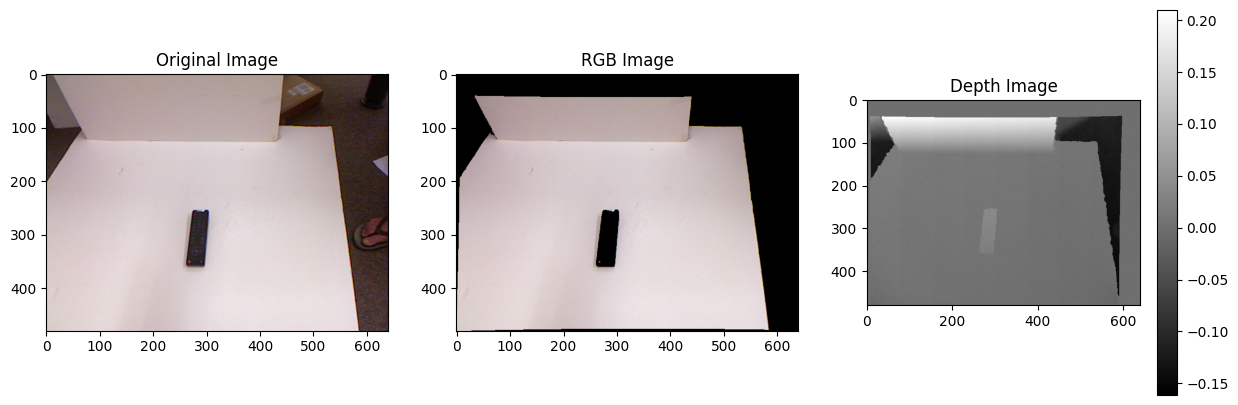

In [26]:
import cv2
import matplotlib.pyplot as plt

original = cv2.imread("./data/01/pcd0100r.png")
rgb = cv2.imread("./data/01/pcd0100_rgb.png")
depth = cv2.imread("./data/01/pcd0100_depth.tiff", cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.title("RGB Image")

plt.subplot(1, 3, 3)
plt.imshow(depth, cmap='gray')
plt.colorbar()
plt.title("Depth Image")

plt.show()

Number of components explaining 95% variance: 11


125

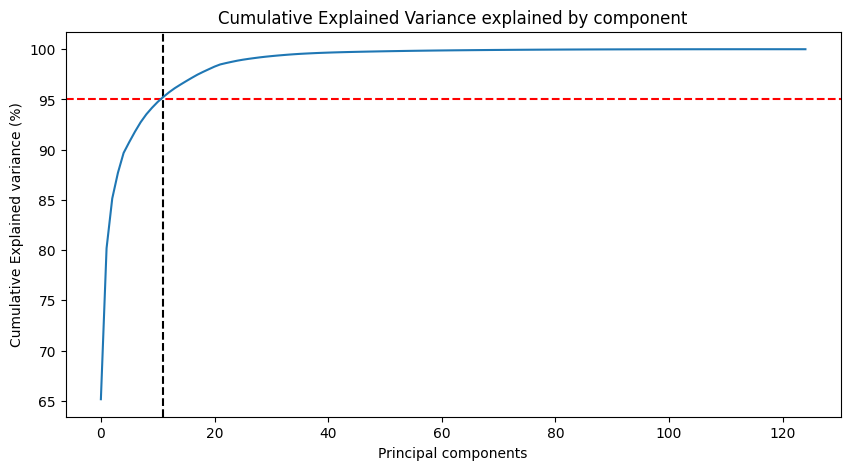

In [28]:
#Crop Image
depth2=depth[250:375,225:350]
#PCA Ops
pca = PCA()
pca.fit(depth2)
# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

len(pca.components_)

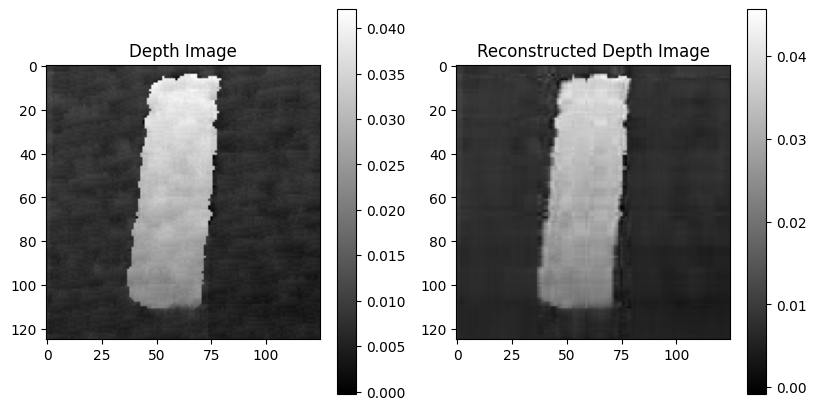

In [29]:
ipca = IncrementalPCA(whiten=True, n_components=11) #manually set to value that explains 95% variance in image.
image_recon = ipca.inverse_transform(ipca.fit_transform(depth2))



plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
depth2=depth[250:375,225:350] #Manually pull an area approximately covered by grasp rectangles
plt.imshow(depth2, cmap='gray')
plt.colorbar()
plt.title("Depth Image")

plt.subplot(1, 3, 2)
plt.imshow(image_recon, cmap='gray')
plt.colorbar()
plt.title("Reconstructed Depth Image")


plt.show()